In [ ]:
%tensorflow_version 2.x

#Diving into the ML ecosystem

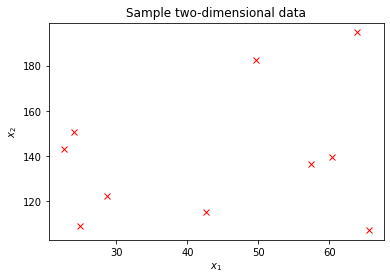

In [ ]:
import matplotlib.pyplot as plt
import random

random.seed(7)

fig = plt.figure()
for i in range(10):
  x1 = abs(random.random()*70.0) + 20.0
  x2 = abs(random.random()*100.0) + 100.0
  plt.plot(x1,x2,'rx')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Sample two-dimensional data')
plt.axis('tight')
plt.savefig('ch.1.sample.data.png', dpi=350, bbox_inches='tight')
plt.savefig('ch.1.sample.data.eps', dpi=350, bbox_inches='tight')
plt.show()

#Introducing deep learning

##The perceptron learning algorithm

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


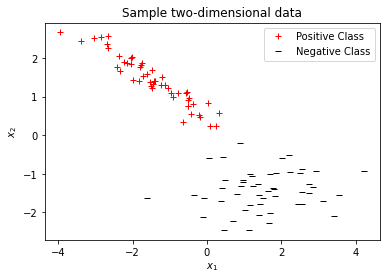

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, 
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_clusters_per_class=1, class_sep=1.4, 
                           random_state=7)
y[y==0] = -1
fig = plt.figure()

plt.plot(X[1,0],X[1,1],'r+',label='Positive Class')
plt.plot(X[2,1],X[2,1],'k_',label='Negative Class')

for i in range(len(y)):
  x1 = X[i,0]
  x2 = X[i,1]
  if (y[i] == 1):
    plt.plot(x1,x2,'r+')
  else:
    plt.plot(x1,x2,'k_')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Sample two-dimensional data')
plt.axis('tight')
plt.savefig('ch.1.two-class.data.png', dpi=350, bbox_inches='tight')
plt.savefig('ch.1.two-class.data.eps', dpi=350, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


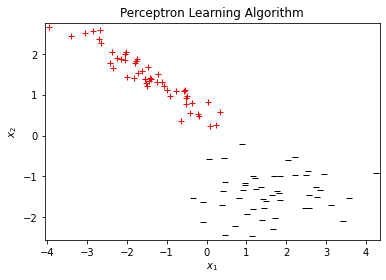

100


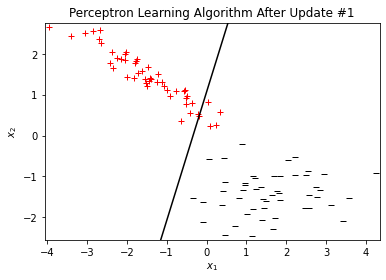

4


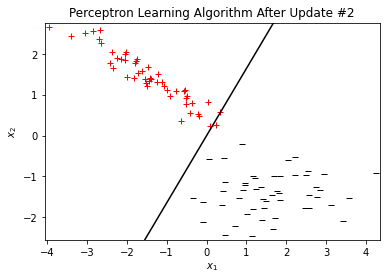

1


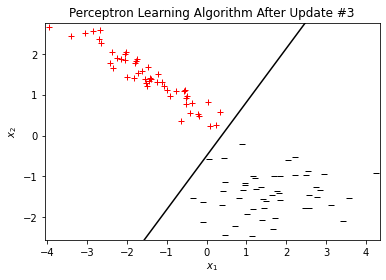

0
Total iterations: 3


In [ ]:
# Some attempt to do the PLA 

import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

def pltPer(X, y, W, it=-1):
  title = "Perceptron Learning Algorithm"
  if it > 0:
    title = title + " After Update #" + str(it)
    
  f = plt.figure()
  for n in range(len(y)):
    if y[n] == 1:
      plt.plot(X[n,1],X[n,2],'r+')
    else:
      plt.plot(X[n,1],X[n,2],'k_')
  m, b = -W[1]/W[2], -W[0]/W[2]
  l = np.linspace(min(X[:,1]),max(X[:,1]))
  plt.plot(l, m*l+b, 'k-')
  plt.axis('tight')
  plt.xlim(min(X[:,1])-0.1, max(X[:,1])+0.1)
  plt.ylim(min(X[:,2])-0.1, max(X[:,2])+0.1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")
  plt.title(title)
  plt.savefig('ch.1.PLA.'+str(it)+'.png', dpi=350, bbox_inches='tight')
  plt.savefig('ch.1.PLA.'+str(it)+'.eps', dpi=350, bbox_inches='tight')
  plt.show()
  


def classification_error(w, X, y):
    err_cnt = 0
    N = len(X)
    for n in range(N):
        s = np.sign(w.T.dot(X[n])) # if this is zero, then :(
        if y[n] != s:
            err_cnt += 1
    print(err_cnt)
    return err_cnt

def choose_miscl_point(w, X, y):
    mispts = []
    # Choose a random point among the misclassified
    for n in range(len(X)):
        if np.sign(w.T.dot(X[n])) != y[n]:
            mispts.append((X[n], y[n]))
    #print(len(mispts))
    return mispts[random.randrange(0,len(mispts))]

  

# main
N = 100
random.seed(a = 7)

X_train = np.append(np.ones((N,1)), X, 1)   # add a column of ones

# initialize the weigths to zeros
w = np.zeros(3)
it = 0
pltPer(X_train,y,w)  # initial solution (bad!)

# Iterate until all points are correctly classified
while classification_error(w, X_train, y) != 0:
  it += 1
  # Pick random misclassified point
  x, s = choose_miscl_point(w, X_train, y)
  # Update weights
  w += s*x
  pltPer(X_train,y,w, it)
print("Total iterations: " + str(it))
    


##Shallow Networks

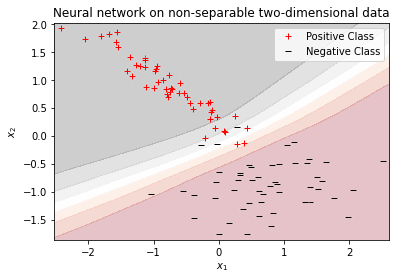

In [ ]:
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


X, y = make_classification(n_samples=100, n_features=2, n_classes=2, 
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_clusters_per_class=1, class_sep=1.0, 
                           random_state=7)

X = StandardScaler().fit_transform(X)
y[y==0] = -1

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

clf = MLPClassifier(alpha=0.1, max_iter=1000, random_state=7)
clf.fit(X, y)
score = clf.score(X, y)

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
cm = plt.cm.RdGy

fig = plt.figure()

plt.contourf(xx, yy, Z, cmap=cm, alpha=.25)

plt.plot(X[1,0],X[1,1],'r+',label='Positive Class')
plt.plot(X[2,1],X[2,1],'k_',label='Negative Class')

for i in range(len(y)):
  x1 = X[i,0]
  x2 = X[i,1]
  if (y[i] == 1):
    plt.plot(x1,x2,'w+', markersize=8, alpha=0.5)
    plt.plot(x1,x2,'r+')
  else:
    plt.plot(x1,x2,'w_', markersize=8, alpha=0.5)
    plt.plot(x1,x2,'k_')


plt.axis('tight')
plt.xlim(min(X[:,0])-0.1, max(X[:,0])+0.1)
plt.ylim(min(X[:,1])-0.1, max(X[:,1])+0.1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Neural network on non-separable two-dimensional data')
plt.savefig('ch.1.MLP.two-class.png', dpi=350, bbox_inches='tight')
plt.show()